In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('peizhi')

### 一份心脏病患者患病情况的数据
- 这份数据集，记录的都是生理的特征，但是我们可以根据这些特征，来反向关注生活习惯。
- 比如胆固醇，蛋黄、猪肝都是引起胆固醇过高的食物，如果我们后面分析后，发现胆固醇过高会引起心脏病，那么平时就要注意少吃这些食物了。

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* age - 年龄
* sex - (1 = male(男性); 0 = (女性))
* cp - chest pain type(胸部疼痛类型)（1：典型的心绞痛-typical，2：非典型心绞痛-atypical，3：没有心绞痛-non-anginal，4：无症状-asymptomatic）
* trestbps - 静息血压 (in mm Hg on admission to the hospital)
* chol - 胆固醇 in mg/dl
* fbs - (空腹血糖 > 120 mg/dl) (1 = true; 0 = false)
* restecg - 静息心电图测量（0：普通，1：ST-T波异常，2：可能左心室肥大）
* thalach - 最高心跳率
* exang - 运动诱发心绞痛 (1 = yes; 0 = no)
* oldpeak - 运动相对于休息引起的ST抑制
* slope - 运动高峰的心电图（1：上坡-upsloping，2：平的-flat，3：下坡-downsloping）
* ca - 主要血管数目(0-4)
* thal - 一种叫做地中海贫血的血液疾病（3 = normal; 6 = 固定的缺陷-fixed defect; 7 = 可逆的缺陷-reversable defect）
* target - 是否患病 (1=yes, 0=no)

- **特征分析**

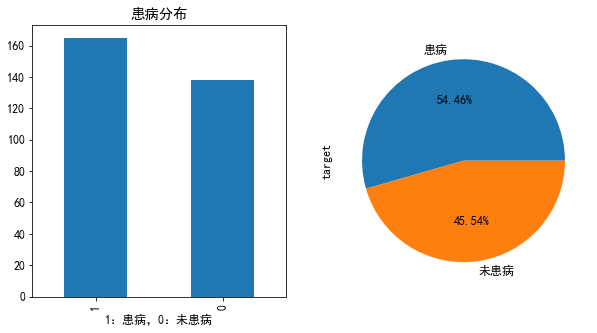

In [3]:
# 患病的分布
fig, axes = plt.subplots(1,2, figsize=(10,5))
ax = heart_df.target.value_counts().plot(kind='bar', ax=axes[0])
ax.set_title("患病分布")
ax.set_xlabel('1：患病，0：未患病')

heart_df.target.value_counts().plot(kind="pie", ax=axes[1], autopct="%.2f%%", labels=['患病', '未患病'])
plt.show()

- 可以看到本数据的患者占比接近55%

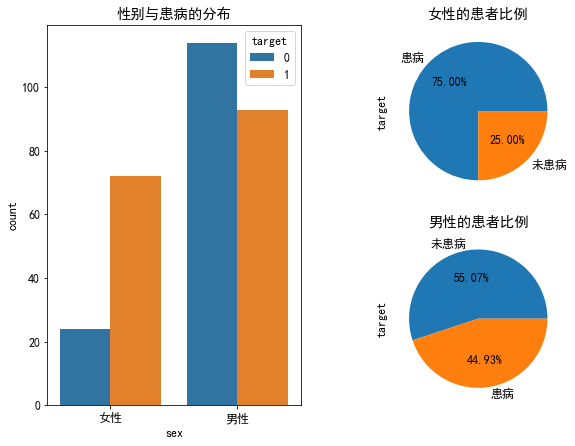

In [4]:
# 性别和患病的分布
plt.figure(figsize=(10,7))
ax1 = plt.subplot(121)
sns.countplot(x='sex', data=heart_df, hue='target', ax=ax1)
ax1.set_xticklabels(['女性', '男性'])
ax1.set_title('性别与患病的分布')

ax2 = plt.subplot(222)
heart_df[heart_df['sex'] == 0]['target'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['患病', '未患病'], ax=ax2 )
ax2.set_title('女性的患者比例')

ax3 = plt.subplot(224)
heart_df[heart_df['sex'] == 1]['target'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['未患病', '患病'], ax=ax3 )
ax3.set_title('男性的患者比例')

plt.show()

- 从上图可以看到女性中的患者人数占比达到75%， 远高于男性中的患者人数占比45%。
- 通过数据集分析发现，**女性患病的概率高于男性**。
- 但由于数据量较小（而且男性女性人数不一致），不能完全认为女性的患病率一定高于男性，只能说根据现有的数据是可以这么认为的

D:\Andconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


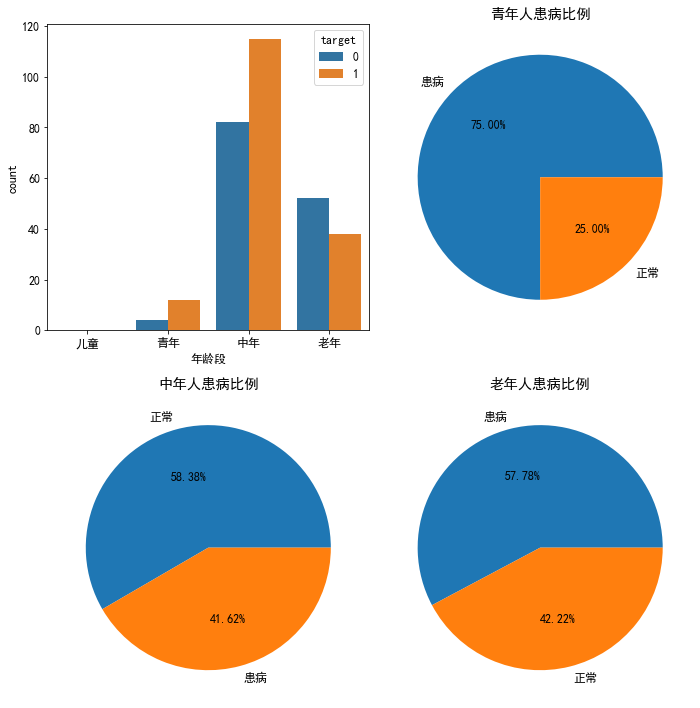

In [5]:
# 年龄和患病的分布

# 将年龄分成“儿童(0-18)”、“青年(18-40)”、“中年(40-60)”、“老年(60-200)”
# 注意实际数据集中没有18岁以下的，所以儿童的年龄不做考虑
fig, axes = plt.subplots(2,2,figsize=(10,10))
age_dist = heart_df[['age','target']]
age_dist['age_range'] = pd.cut(age_dist['age'], bins=[0,18,40,60,200], include_lowest=True, right=False,
                               labels=['儿童','青年','中年','老年'])
sns.countplot(x="age_range", hue="target", data=age_dist,ax=axes[0,0])
axes[0,0].set_xlabel("年龄段")

youth = age_dist[age_dist['age_range'] == '青年']['target'].value_counts()
axes[0,1].pie(youth, labels=['患病','正常'], autopct="%.2f%%")
axes[0,1].set_title("青年人患病比例")

middle = age_dist[age_dist['age_range'] == '中年']['target'].value_counts()
axes[1,0].pie(middle,labels=['正常','患病'],autopct="%.2f%%")
axes[1,0].set_title("中年人患病比例")

old = age_dist[age_dist['age_range'] == '老年']['target'].value_counts()
axes[1,1].pie(old, labels=['患病','正常'], autopct="%.2f%%")
axes[1,1].set_title("老年人患病比例")

plt.tight_layout()
plt.show()

- 从上图中可以看出，这份数据集中年人是占了大多数。
- 其次可以看出，青年人出现心脏病的概率达到75%，而中年人和老年人的患病概率分别为58.4%和42.2%，由于青年人的数据太少，具有偶然性，无法完全确认青年人的患病率一定高于中老年人的患病率，**但就这份数据而言，随着年龄的增加，患病率会减小**。

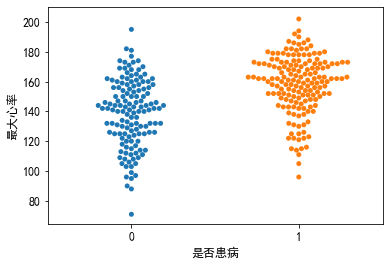

In [6]:
# 心率与患病的关系
ax = sns.swarmplot(x="target", y="thalach", data=heart_df)
ax.set_xlabel("是否患病")
ax.set_ylabel("最大心率")

plt.show()

- 可以看到，**患心脏病的人的心率普遍比普通人高**，所以心率比较高的，要多多注意

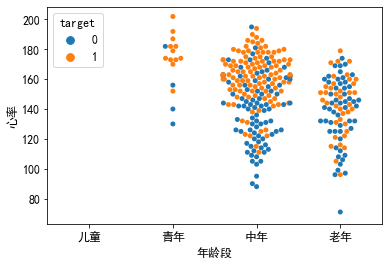

In [7]:
# 年龄与心率的相关性
heart_df['age_range'] = pd.cut(age_dist['age'], bins=[0,18,40,60,200], include_lowest=True, right=False,
                         labels=['儿童','青年','中年','老年'])
ax = sns.swarmplot(x="age_range", y="thalach", data=heart_df, hue="target")
ax.set_xlabel("年龄段")
ax.set_ylabel("心率")

plt.show()

- 从图中可以发现，青年人的心率分布 > 中年人 > 老年人，所以心率是随着年龄增长而不断降低的。
- 但是，我们还可以发现，在同年龄段中，**患病的大多都是心率高的（黄色点的分布较蓝色点更高）**，青年患者心率大都在160以上，中年患者心率大都在140以上，老年患者心率则都在100以上。
- 所以，如果超过同龄人的心率，除非是身体特别好，否则建议去医院检查一下！

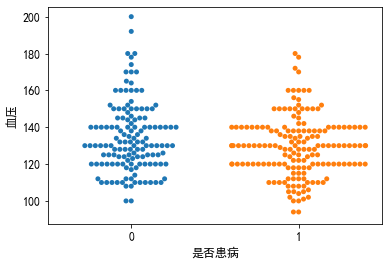

In [8]:
# 血压与患病的关系
ax = sns.swarmplot(x="target",y="trestbps",data=heart_df)
ax.set_xlabel("是否患病")
ax.set_ylabel("血压")

plt.show()

- 可以看到是否患病在血压这个特征上并无明显区别，从本数据集中来看，**暂时无法确定血压的高低与是否患心脏病之间存在显著相关性**。

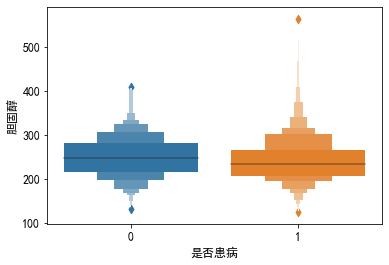

In [9]:
# 胆固醇与患病的关系
ax = sns.boxenplot(x="target",y="chol",data=heart_df)
ax.set_xlabel("是否患病")
ax.set_ylabel("胆固醇")

plt.show()

- 从上图可以看出，**患心脏病的人的胆固醇总体来讲比没有患病的人低一些，但是差异并不明显**。
- 在数据不是很充足的情况下，无法直接下结论，因此关于胆固醇的高低是否会直接影响到患心脏病，还需更多数据进行确认。

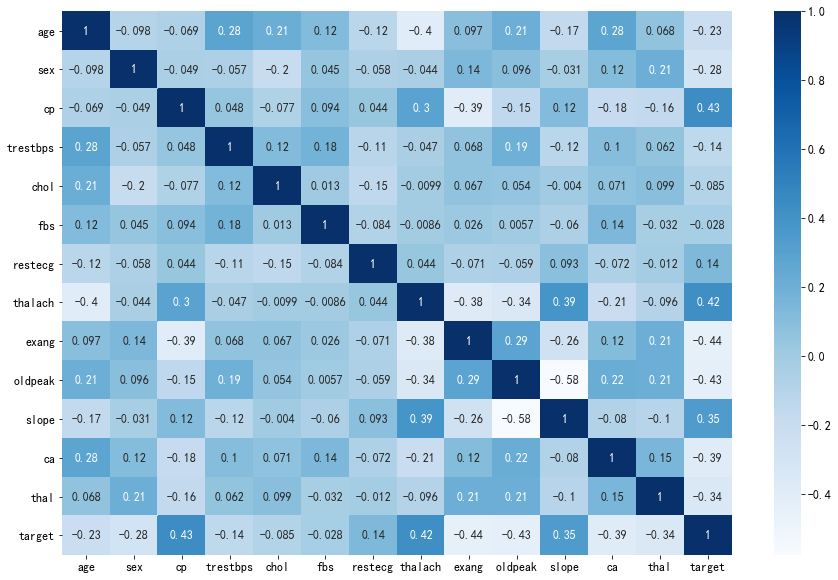

In [10]:
# 查看各个特征之间的关联性
# heart_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(heart_df.corr(), cmap="Blues", annot=True)

plt.show()

- 通过上图可以看到和是否患病target呈正相关的有cp,restecg,thalach,slope,其余全部呈负相关
- slope和oldpeak之间的负相关性较高，接近-0.6，说明当运动相对于休息引起的ST抑制增大时，运动高峰的心电图呈上坡趋势

#### 建模分析

In [11]:
# 数据预处理
features = heart_df.drop(['target', 'age_range'], axis=1)
targets = heart_df['target']

In [12]:
# 将离散型数据，从0，1，2这些，转换成字符串表示

# sex
features.loc[features['sex'] == 0, 'sex'] = "female"
features.loc[features['sex'] == 1, 'sex'] = "male"

# cp
features.loc[features['cp'] == 1, 'cp'] = "typical"
features.loc[features['cp'] == 2, 'cp'] = "atypical"
features.loc[features['cp'] == 3, 'cp'] = "non-anginal"
features.loc[features['cp'] == 4, 'cp'] = "asymptomatic"

# fbs
features.loc[features['fbs'] == 1, 'fbs'] = "true"
features.loc[features['fbs'] == 0, 'fbs'] = "false"

# exang
features.loc[features['exang'] == 0, 'exang'] = "false"
features.loc[features['exang'] == 1, 'exang'] = "true"

# slope
features.loc[features['slope'] == 1,'slope'] = 'true'
features.loc[features['slope'] == 2,'slope'] = 'true'
features.loc[features['slope'] == 3,'slope'] = 'true'

# thal
features.loc[features['thal'] == 3,'thal'] = 'normal'
features.loc[features['thal'] == 6,'thal'] = 'fixed'
features.loc[features['thal'] == 7,'thal'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features['ca'].astype("object")

# thal
features.thal.astype("object")

features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,non-anginal,145,233,true,normal,150,false,2.3,0,0,1
1,37,male,atypical,130,250,false,ST-T abnormal,187,false,3.5,0,0,2
2,41,female,typical,130,204,false,normal,172,false,1.4,true,0,2
3,56,male,typical,120,236,false,ST-T abnormal,178,false,0.8,true,0,2
4,57,female,0,120,354,false,ST-T abnormal,163,true,0.6,true,0,2


In [13]:
# 归一化（one-hot编码）标准化
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = pd.get_dummies(features)
features_temp = StandardScaler().fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_temp, targets, test_size=0.25)

#### 分类建模
- 1. K近邻
- 2. 决策树
- 3. 随机森林
- 4. 逻辑回归
- 5. SGD分类

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, auc
# https://www.jianshu.com/p/c61ae11cc5f6

- **绘制精准率召回率曲线，ROC曲线----函数 plotting(estimator, X_test, y_test)**

In [15]:
# 绘制精准率召回率曲线，ROC曲线！！！
def plotting(estimator, X_test, y_test):
    
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test) # 预测的概率
    # 绘制精准率召回率曲线
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_predict_proba[:, 1])# 精准率，召回率，阈值
    axes[0].plot(precisions, recalls)
    axes[0].set_title("平均精准率：%.2f" % average_precision_score(y_test, y_predict_proba[:, 1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")
    # ROC曲线
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])# fpr，tpr，阈值
    axes[1].plot(fpr, tpr)
    axes[1].set_title("AUC值：%.2f" % auc(fpr, tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")

    plt.tight_layout()

准确率： 0.8317486338797814
精准率： 0.7894736842105263
召回率： 0.8333333333333334
F1得分： 0.8108108108108109


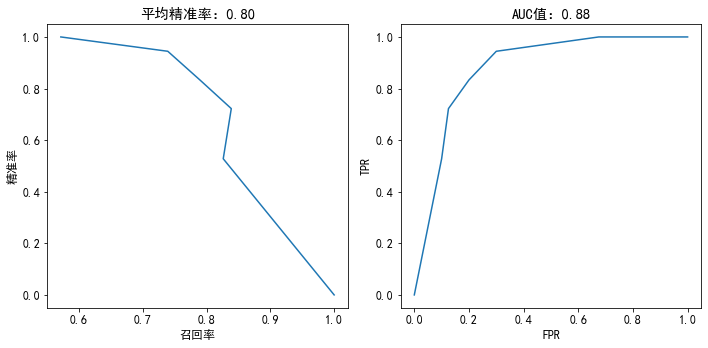

In [16]:
# 1. K近邻
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 交叉验证
scores = cross_val_score(knn, features_temp, targets, cv=5)
print("准确率：", scores.mean())

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
# 精确率
print("精准率：", precision_score(y_test, y_predict))
# 召回率
print("召回率：", recall_score(y_test, y_predict))
# F1-score
print("F1得分：", f1_score(y_test, y_predict))

# 使用自定义函数直接绘制评估曲线
plotting(knn, X_test, y_test)

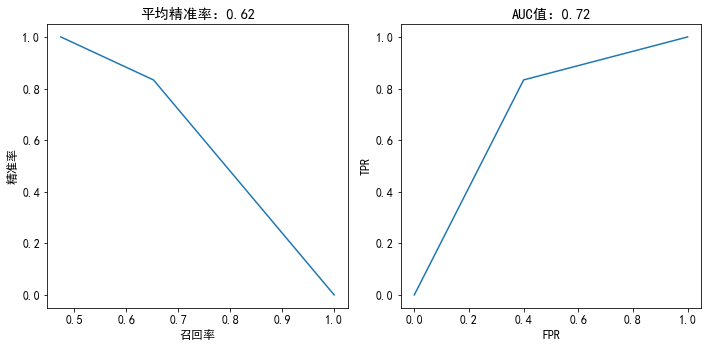

In [17]:
# 2. 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

plotting(tree, X_test, y_test)

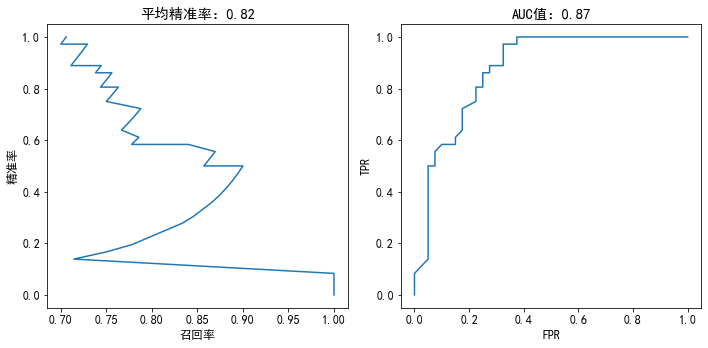

In [18]:
# 3. 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

plotting(rf, X_test, y_test)

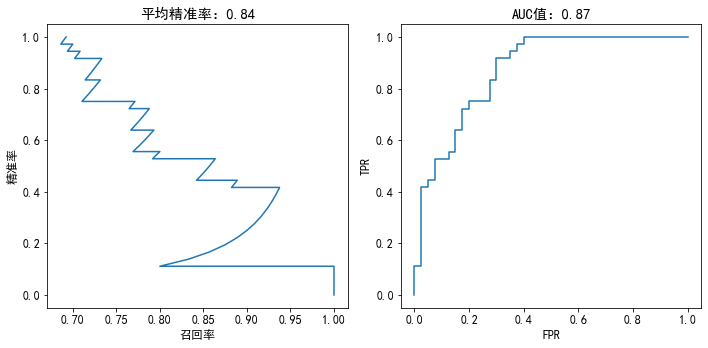

In [19]:
# 4. 逻辑回归
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(tol=1e-10) 
logic.fit(X_train, y_train)

plotting(logic, X_test, y_test)

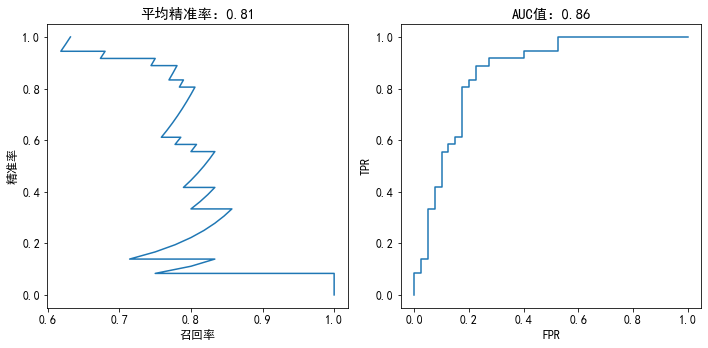

In [20]:
# 5. SGD分类
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log')# 注意此处要修改损失函数为 log
sgd.fit(X_train, y_train)

plotting(sgd, X_test, y_test)

- 通过以上的模型对比，可看出逻辑回归和随机森林是检测是否患病的较优模型，K近邻，SGD和决策树都不稳定（训练值不同，结果影响非常大）

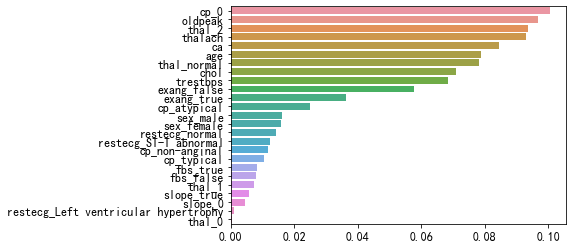

In [21]:
# 获取特征的重要性(使用随机森林，决策树不准确)
importances = pd.Series(data=rf.feature_importances_, index=features.columns).sort_values(ascending=False)
sns.barplot(y=importances.index, x=importances.values)

- 可以看到大部分特征都会对患病有所影响，只是影响程度都不算高，最高的影响也只有0.12